# Algorithms for Uncertainty Quantification

## Tutorial 3: More advanced Monte Carlo techniques

In this worksheet, we focus on more advanced sampling techniques.

### Relative error

Since computational science (generally) relies on discrete versions of continuous quantities/models, we want to estimate the resulting error. To this end, there are several error indicators that can be employed. Among these, there is the relative error. Assuming that approx denotes the approximation and ref denotes the true (reference) value of the underlying quantity that we try to approximate, the relative error is

\begin{align}
\displaystyle \mathrm{r}\mathrm{e}1_{\mathrm{e}\mathrm{r}\mathrm{r}\mathrm{o}\mathrm{r}}=|1-\frac{\mathrm{a}\mathrm{p}\mathrm{p}\mathrm{r}\mathrm{o}\mathrm{x}}{\mathrm{r}\mathrm{e}\mathrm{f}}|, (1)
\end{align}


However, note that Eq. (1) relies on the true value of the quantity that we try to approximate. The true value is available in $\mathrm{a}$ (very) limited number of situations. Therefore, most often, the ( $(\mathrm{t}\mathrm{r}\mathrm{u}\mathrm{e}$'' value is considered to be the most accurate approximation, e.g. the approximation on the finest grid or with the largest number of samples.

### Improving standard Monte Carlo sampling

In the lecture, we saw that there exist several methods to improve the accuracy of standard Monte Carlo sampling. Remember that when approximating $I=\displaystyle \int_{0}^{1}f(x)dx$ via standard standard Monte Carlo sampling, the associated standard error is
\begin{align}
\displaystyle \hat{\sigma}_{\hat{I}_{f}}=\frac{\hat{\sigma}_{f}}{\sqrt{N}}, \displaystyle \hat{\sigma}_{f}^{2}=\frac{1}{N-1}\sum_{i=1}^{N}(f(U_{i})-\hat{I}_{f})^{2}, \{U_{i}\}_{i=1}^{N}= samples from \mathcal{U}(0,1), (2)
\end{align}

One approach to reduce $\hat{\sigma}_{\hat{I}_{f}}$ is to reduce $\hat{\sigma}_{f}$. To this end, in the lecture we discussed the following strategies (see the lecture slides for more details)

$\bullet$ antithetic sampling

$\bullet$ stratified sampling

$\bullet$ control variates

$\bullet$ import sampling

### Assignment 1

Consider $f$ : $[0,\ 1]\rightarrow \mathbb{R}, f(x)=\exp(x)dx$. Compute analytically $\displaystyle \int_{0}^{1}f(x)dx$; this will be your reference result. Estimate $\displaystyle \int_{0}^{1}f(x)dx$ using $N= [1000, 10000, 100000, 1000000]$ samples and

$\bullet$ standard Monte Carlo sampling

$\bullet$ control variates with $\phi(x)=x, \phi(x)=1+x$

$\bullet$ importance sampling with a beta distribution $g_{X}(x)=\displaystyle \frac{x^{\alpha-1}(1-x)^{\beta-1}}{\mathrm{B}(\alpha,\beta)}$, where $\mathrm{B}(\alpha,\ \beta)=\displaystyle \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ and $\gamma( \alpha)=\int_{0}^{\infty}x^{\alpha-1}e^{-x}dx$. Choose $\alpha=5, \beta=1$ and $\alpha=0.5, \beta=0.5$
(Hint: for the beta distribution: {to sample, you could use numpy. random. beta} $(a,$ $b, size=None)$ ; to evaluate the PDF, you could use $sc\dot{x}py$.  stats. beta.)

Compute the relative error for each strategy using Eq. (1). Plot the errors in a loglog plot. Run the code several times. What do you observe?

### Quasi-Monte Carlo sampling for UQ

Besides reducing the variance of pseudo-random number-based approaches, an alternative way to improve standard Monte Carlo sampling is employing different number generation techniques, such as deterministic sequences. A prominent example is the low-discrepancy sequences, such as Halton or Sobol sequences; in the lecture, we discussed Halton sequences. Employing low-discrepancy sequences leads to the so-called quasi-Monte Carlo (QMC) method. The error of QMC is $\displaystyle \mathcal{O}(\frac{\log(N)^{d}}{N})$ (compared to standard Monte Carlo sampling, whose error reads $\displaystyle \mathcal{O}(\frac{1}{\sqrt{N}})$ ).

In chaospy, it is very easy to generate QMC samples. For example, if your distribution is $\mathcal{U}(0,1)$ and you want to generate 1000 Halton sequence-based samples, the syntax is import chaospy as cp distr $=$ cp. Uniform $()$ samples $=$ dis $\mathrm{t}\mathrm{r}$. samples $(\mathrm{s}\mathrm{i}\mathrm{z}\ \mathrm{e}=1000,\ \mathrm{r}\mathrm{u}\mathrm{l}\mathrm{e}=' \mathrm{H}')$

### Quasi-Monte Carlo sampling in the model problem

Consider the model problem that we used so far, the linear damped oscillator

$$

(3)

\begin{align}
\left\{\begin{array}{l}
\frac{d^{2}y}{dt^{2}}(t)+c\frac{dy}{dt}(t)+ky(t)=f\cos(\omega t)\\
y(0)=y_{0}\\
\frac{dy}{dt}(0)=y_{1},
\end{array}\right., (3)
\end{align}

where $c$ is the damping coefficient, $k$ the spring constant, $f$ the forcing amplitude, $\omega$ the frequency, $y_{0}$ represents the initial position, whereas $y_{1}$ is the initial velocity. Considering $t\in[0$, 20 $], \triangle t=0.01, c=0.5, k=2.0, f=0.5, \omega=1.0, y_{0}=0.5, y_{1}=0.0,$ use the odeintl function from scipy. integrate to discretize the model from Eq. (3).

### Assignment 2.1

Assume that $\omega\sim \mathcal{U}(0.95,1.05)$ . For this setting, the reference results are $\mathrm{E}_{\mathrm{r}\mathrm{e}\mathrm{f}}=$ $-0.43897$ and $\mathrm{V}\mathrm{a}\mathrm{r}_{\mathrm{r}\mathrm{e}\mathrm{f}}=0.00019653$. Write a python program and employ the chaospy
library to propagate the uncertainty in $\omega$ through the model in Eq. (3). Use both standard Monte Carlo sampling and quasi-Monte Carlo based on Halton sequences with $\mathrm{N}=[10$, 100, 1000, 10000 $]$ samples. Compute the mean and variance of $y(10)$ and their relative error with respect to the reference results using Eq. (1). Plot the errors in a loglog plot. What do you observe?

### Assignment 2.2

Repeat the above experiment assuming that $\omega\sim \mathcal{U}(0.8,1.2)$ . In this case, the reference results are $\mathrm{E}_{\mathrm{r}\mathrm{e}\mathrm{f}}=-0.26079$ and $\mathrm{V}\mathrm{a}\mathrm{r}_{\mathrm{r}\mathrm{e}\mathrm{f}}=0.02599844$. What do you observe?

* see https: https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.odeint.html


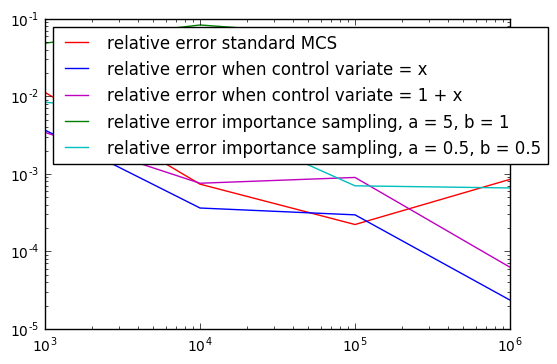

In [4]:
#Assigmnent 1
import numpy as np
from scipy.stats import beta
from matplotlib.pyplot import *

# function to compute relative error
def get_rel_err(approx, ref): 
    return abs(1. - approx/ref)

# standard monte carlo samplig
def std_mcs(func, n_samples):
    samples = np.random.uniform(0, 1, n_samples)
    I_hat_f = np.mean(func(samples))

    return I_hat_f

# control variate with control variates; we assume that we know the integral of the control variate
def control_variate(func, cv, integral_cv_eval, n_samples):      
    samples = np.random.uniform(0, 1, n_samples) 

    integral_diff_approx = np.mean(func(samples) - cv(samples))

    I_hat_f = integral_cv_eval + integral_diff_approx

    return I_hat_f

# importance sampling using a beta distribution
def importance_sampling(func, a, b, n_samples):
    # generate samples from the beta distribution
    samples = np.random.beta(a=a, b=b, size=n_samples)

    # ration between f and g_X
    h = lambda x: func(x)/beta.pdf(x, a, b)

    I_hat_f = np.mean(h(samples))

    return I_hat_f

if __name__ == '__main__':
    # declare function to integrate via Monte Carlo sampling
    func = lambda x: np.exp(x)
    # compute integreal_0^1 func(x)dx
    ref_sol = func(1.) - func(0.)

    # declare vector with number of samples
    N = [1000, 10000, 100000, 1000000]

    # declare the control variates and compute their integral
    cv              = [lambda x: x, lambda x: 1. + x]
    integral_cv     = [0.5, 1.5]

    # declare values for the a and b parameters for the beta distribution
    a = [5, 0.5]
    b = [1, 0.5]

    # vector to put all relative errors
    rel_err_mcs   = np.zeros(len(N))
    rel_err_cv    = np.zeros((len(N), len(integral_cv)))
    rel_err_ip    = np.zeros((len(N), len(a)))

    # for each N, perform Monte Carlo integration
    for i, n in enumerate(N):
        approx_mcs      = std_mcs(func, n)
        rel_err_mcs[i]  = get_rel_err(approx_mcs, ref_sol) 

        for j in range(len(a)):
            approx_cv  = control_variate(func, cv[j], integral_cv[j], n)
            approx_ip  = importance_sampling(func, a[j], b[j], n) 

            rel_err_cv[i, j] = get_rel_err(approx_cv, ref_sol)
            rel_err_ip[i, j] = get_rel_err(approx_ip, ref_sol)

    # plot results
    loglog(N, rel_err_mcs, 'r', label='relative error standard MCS')
    loglog(N, rel_err_cv[:, 0], 'b', label='relative error when control variate = x')
    loglog(N, rel_err_cv[:, 1], 'm', label='relative error when control variate = 1 + x')
    loglog(N, rel_err_ip[:, 0], 'g', label='relative error importance sampling, a = 5, b = 1')
    loglog(N, rel_err_ip[:, 1], 'c', label='relative error importance sampling, a = 0.5, b = 0.5')

    legend(loc='best')
    show()

C:\Users\Marzieh\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


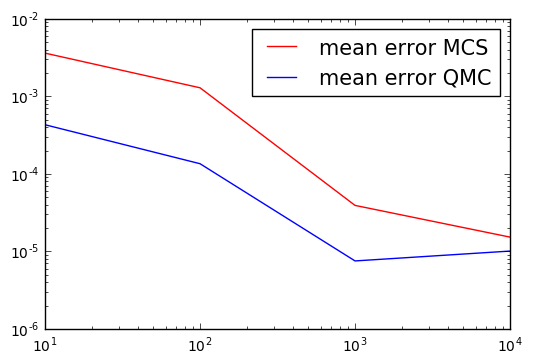

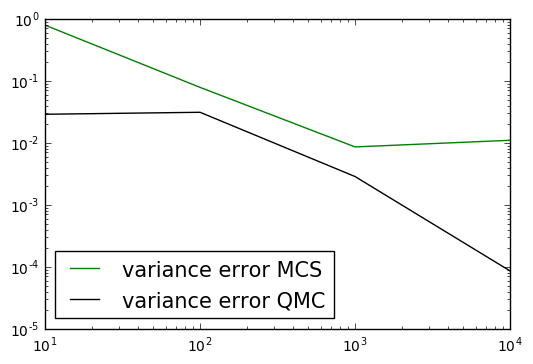

In [5]:
# Assignmnet 2.1
import numpy as np
import chaospy as cp
from scipy.integrate import odeint
from matplotlib.pyplot import *

# to use the odeint function, we need to transform the second order differential equation
# into a system of two linear equations
def model(w, t, p):
	x1, x2 		= w
	c, k, f, w 	= p

	f = [x2, f*np.cos(w*t) - k*x1 - c*x2]

	return f

# discretize the oscillator using the odeint function
def discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest):
	sol = odeint(model, init_cond, t, args=(args,), atol=atol, rtol=rtol)

	return sol[t_interest, 0]

if __name__ == '__main__':
    # relative and absolute tolerances for the ode int solver
    atol = 1e-10
    rtol = 1e-10

    # parameters setup as specified in the assignement
    c   = 0.5
    k   = 2.0
    f   = 0.5
    y0  = 0.5
    y1  = 0.

    # w is no longer deterministic
    w_left    = 0.95
    w_right   = 1.05
    stat_ref  = [-0.43897, 0.00019653]
    
    # create uniform distribution object
    distr_w = cp.Uniform(w_left, w_right)

    # no of samples from Monte Carlo sampling
    no_samples_vec = [10, 100, 1000, 10000]

    # time domain setup
    t_max       = 20.
    dt          = 0.01
    grid_size   = int(t_max/dt) + 1
    t           = np.array([i*dt for i in range(grid_size)])
    t_interest  = len(t)/2

    # initial conditions setup
    init_cond   = y0, y1

    # create vectors to contain the expectations and variances
    err_exps_mcs = np.zeros(len(no_samples_vec))
    err_vars_mcs = np.zeros(len(no_samples_vec))

    err_exps_qmc = np.zeros(len(no_samples_vec))
    err_vars_qmc = np.zeros(len(no_samples_vec))

    # compute relative error
    relative_err = lambda approx, real: abs(1. - approx/real)

    # perform Monte Carlo sampling
    for i, no_samples in enumerate(no_samples_vec):
        samples_mcs = distr_w.sample(size=no_samples)
        samples_qmc = distr_w.sample(size=no_samples, rule='H')

        sol_odeint_mcs = np.zeros(no_samples)
        sol_odeint_qmc = np.zeros(no_samples)

        # Monte Carlo sampling; for each input sample, compute the underlying solution
        for j, w in enumerate(samples_mcs):
            args                = c, k, f, w
            sol_odeint_mcs[j]   = discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest)

        # Quasi Monte Carlo sampling; for each input sample, compute the underlying solution
        for j, w in enumerate(samples_qmc):
            args                = c, k, f, w
            sol_odeint_qmc[j]   = discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest)

        # compute statistics
        err_exps_mcs[i] = relative_err(np.mean(sol_odeint_mcs), stat_ref[0])
        err_vars_mcs[i] = relative_err(np.var(sol_odeint_mcs, ddof=1), stat_ref[1])

        # compute statistics
        err_exps_qmc[i] = relative_err(np.mean(sol_odeint_qmc), stat_ref[0])
        err_vars_qmc[i] = relative_err(np.var(sol_odeint_qmc, ddof=1), stat_ref[1])

    # plot results
    loglog(no_samples_vec, err_exps_mcs, 'r', label='mean error MCS')
    loglog(no_samples_vec, err_exps_qmc, 'b', label='mean error QMC')
    legend(loc='best', fontsize=15)

    figure()
    loglog(no_samples_vec, err_vars_mcs, 'g', label='variance error MCS')
    loglog(no_samples_vec, err_vars_qmc, 'k', label='variance error QMC')
    legend(loc='best', fontsize=15)

    show()

C:\Users\Marzieh\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


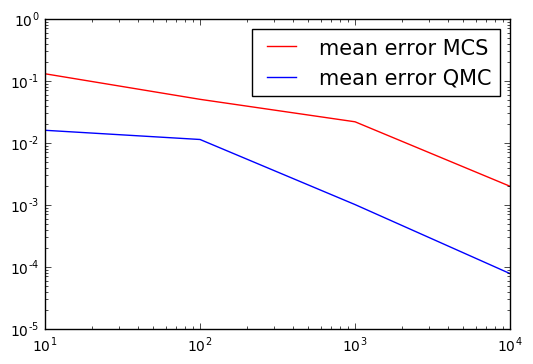

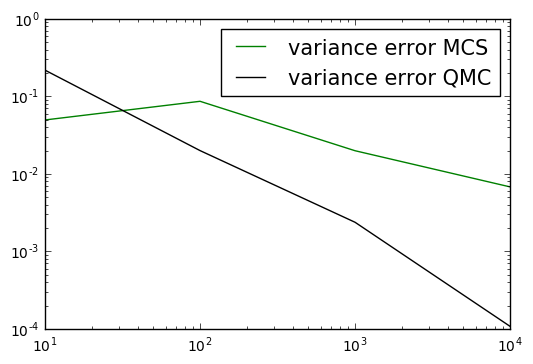

In [7]:
# Assignmnet 2.2
import numpy as np
import chaospy as cp
from scipy.integrate import odeint
from matplotlib.pyplot import *

# to use the odeint function, we need to transform the second order differential equation
# into a system of two linear equations
def model(w, t, p):
	x1, x2 		= w
	c, k, f, w 	= p

	f = [x2, f*np.cos(w*t) - k*x1 - c*x2]

	return f

# discretize the oscillator using the odeint function
def discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest):
	sol = odeint(model, init_cond, t, args=(args,), atol=atol, rtol=rtol)

	return sol[t_interest, 0]

if __name__ == '__main__':
    # relative and absolute tolerances for the ode int solver
    atol = 1e-10
    rtol = 1e-10

    # parameters setup as specified in the assignement
    c   = 0.5
    k   = 2.0
    f   = 0.5
    y0  = 0.5
    y1  = 0.

    # w is no longer deterministic
    w_left      = 0.8
    w_right     = 1.2
    stat_ref    = [-0.26079, 0.02599844]

    # create uniform distribution object
    distr_w = cp.Uniform(w_left, w_right)

    # no of samples from Monte Carlo sampling
    no_samples_vec = [10, 100, 1000, 10000]

    # time domain setup
    t_max       = 20.
    dt          = 0.01
    grid_size   = int(t_max/dt) + 1
    t           = np.array([i*dt for i in range(grid_size)])
    t_interest  = len(t)/2

    # initial conditions setup
    init_cond   = y0, y1

    # create vectors to contain the expectations and variances
    err_exps_mcs = np.zeros(len(no_samples_vec))
    err_vars_mcs = np.zeros(len(no_samples_vec))

    err_exps_qmc = np.zeros(len(no_samples_vec))
    err_vars_qmc = np.zeros(len(no_samples_vec))

    # compute relative error
    relative_err = lambda approx, real: abs(1. - approx/real)

    # perform Monte Carlo sampling
    for i, no_samples in enumerate(no_samples_vec):
        samples_mcs = distr_w.sample(size=no_samples)
        samples_qmc = distr_w.sample(size=no_samples, rule='H')

        sol_odeint_mcs = np.zeros(no_samples)
        sol_odeint_qmc = np.zeros(no_samples)

        # Monte Carlo sampling; for each input sample, compute the underlying solution
        for j, w in enumerate(samples_mcs):
            args                = c, k, f, w
            sol_odeint_mcs[j]   = discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest)

        # Quasi Monte Carlo sampling; for each input sample, compute the underlying solution
        for j, w in enumerate(samples_qmc):
            args                = c, k, f, w
            sol_odeint_qmc[j]   = discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest)

        # compute statistics
        err_exps_mcs[i] = relative_err(np.mean(sol_odeint_mcs), stat_ref[0])
        err_vars_mcs[i] = relative_err(np.var(sol_odeint_mcs, ddof=1), stat_ref[1])

        # compute statistics
        err_exps_qmc[i] = relative_err(np.mean(sol_odeint_qmc), stat_ref[0])
        err_vars_qmc[i] = relative_err(np.var(sol_odeint_qmc, ddof=1), stat_ref[1])

    # plot results
    loglog(no_samples_vec, err_exps_mcs, 'r', label='mean error MCS')
    loglog(no_samples_vec, err_exps_qmc, 'b', label='mean error QMC')
    legend(loc='best', fontsize=15)

    figure()
    loglog(no_samples_vec, err_vars_mcs, 'g', label='variance error MCS')
    loglog(no_samples_vec, err_vars_qmc, 'k', label='variance error QMC')
    legend(loc='best', fontsize=15)

    show()